In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('C:/Users/MANISH GOLA/Downloads/glass.csv')

In [5]:
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
'''pd.read_csv('C:/Users/MANISH GOLA/Downloads/glass.csv').head()'''

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0
mean,3.000000,1.517976,13.508000,3.790000,1.306000,72.638000,0.410000,8.130000,0.0,0.0,1.0
std,1.581139,0.001801,0.278065,0.394525,0.161802,0.515917,0.207966,0.390064,0.0,0.0,0.0
min,1.000000,1.516180,13.210000,3.550000,1.100000,71.780000,0.060000,7.780000,0.0,0.0,1.0
25%,2.000000,1.517420,13.270000,3.600000,1.240000,72.610000,0.390000,7.830000,0.0,0.0,1.0
50%,3.000000,1.517610,13.530000,3.620000,1.290000,72.730000,0.480000,8.070000,0.0,0.0,1.0
75%,4.000000,1.517660,13.640000,3.690000,1.360000,72.990000,0.550000,8.220000,0.0,0.0,1.0
max,5.000000,1.521010,13.890000,4.490000,1.540000,73.080000,0.570000,8.750000,0.0,0.0,1.0


In [11]:
data.isnull().any()

Id               False
RI               False
Na               False
Mg               False
Al               False
Si               False
K                False
Ca               False
Ba               False
Fe               False
Type of glass    False
dtype: bool

In [12]:
data.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [13]:
data.isnull().values.any()

False

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>],
       [<AxesSubplot:title={'center':'Mg'}>,
        <AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>],
       [<AxesSubplot:title={'center':'Fe'}>,
        <AxesSubplot:title={'center':'Type of glass'}>, <AxesSubplot:>]],
      dtype=object)

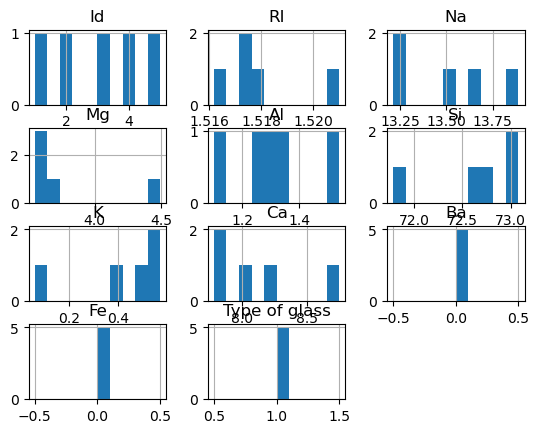

In [14]:
data.hist()

<AxesSubplot:>

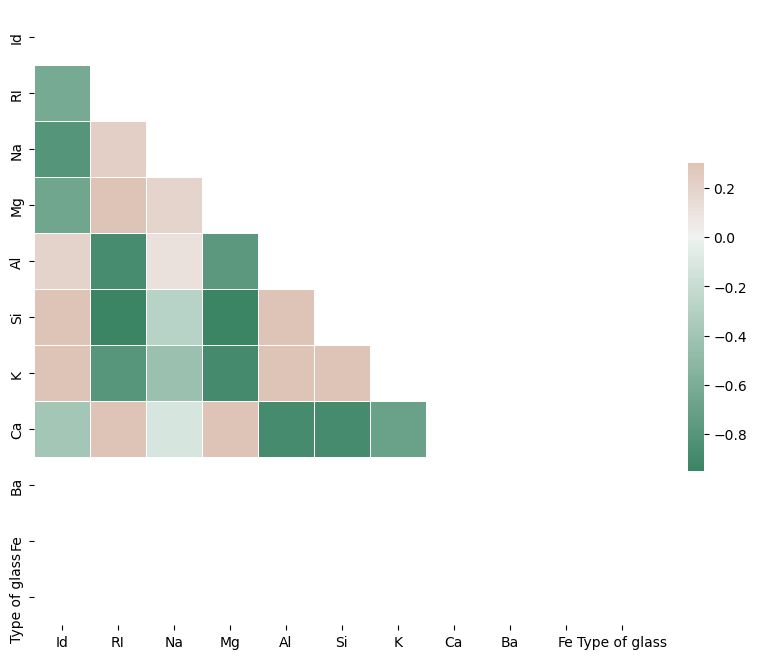

In [15]:
corr2 = data.corr()

mask = np.triu(np.ones_like(corr2, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(150, 30, as_cmap=True)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
data = data.drop('Id', axis=1)

In [18]:
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [19]:
data['Type of glass'].value_counts()

1    5
Name: Type of glass, dtype: int64

In [20]:
dat = data.pop('Type of glass')

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lblency = LabelEncoder()
lblency.fit(dat)
datlbl = lblency.transform(dat)
datlbl = pd.DataFrame(datlbl, columns=['type'])

In [26]:
from sklearn.preprocessing import StandardScaler